# Using Public Health Statistics to Assess Medical Risks of Different Demographics

#### Testing out a Proper Paper Format

##### Zack Wang

**SETUP**

This is a mockup Jupyter notebook meant to test my skills and just be practice on how to treat data in a report-style setting. I will try to import, display, and analyze some data in this format and see how things go...


So to start, we want to set up some goals and purposes for this experiment, and see how the data works. So first things first we are looking at the Florida Public Data regarding demographics and public health. 
We need to upload this data, which we have saved as a csv on our local computer. 
To do this, we gotta first import our csv into this project folder, so anyone with access to this project can see and work with this data. Then, it'd be nice to display said data. 

In [20]:
import pandas as pd
import plotly.plotly as py
import plotly.figure_factory as ff
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as pl
df = pd.read_csv('data.csv')
print(df)

    FairPoor  Physically Unhealthy Days  Mentally Unhealthy Days   LBW  \
0         15                        3.5                      3.3   8.8   
1         29                        7.5                      4.7   9.5   
2         17                        5.6                      5.6   8.5   
3         15                        3.7                      5.0   9.9   
4         14                        4.3                      4.3   8.2   
5         14                        3.4                      3.4   9.3   
6         36                        7.2                      5.5   8.5   
7         20                        3.9                      5.0   7.5   
8         17                        4.4                      4.6   7.5   
9         13                        3.3                      3.5   7.8   
10        17                        3.4                      3.6   7.1   
11        22                        4.8                      4.5   8.6   
12        16                        3.

Now this is a massive dataset, and the table is kind of unsightly. SO now lets try and trim down the data significantly, and start from there. and also tabularize it...
With no exact 'output' or class for this dataset I played around with some of the factors. I first looked at factors that seemed to be linked, as a sanity check. I looked through and grouped four classifiers that all seemed roughly "economic", being Medical Cost, Child Poverty, Unemployment, Household Income, and FairPoor. Now, we need to rescale this and trim our data. 

In [3]:
cols = ['FairPoor', 'Health Costs','Household Income', 'Free Lunch']
trimmed = df[cols]
print(trimmed)

    FairPoor  Health Costs  Household Income  Free Lunch
0         15          9515             41297          41
1         29         12896             45721          40
2         17         11812             45259          46
3         15         10846             38680          57
4         14         10808             46332          35
5         14         11904             49564          46
6         36         11557             33418          52
7         20         10941             44454          49
8         17         10159             38937          46
9         13         11334             56359          29
10        17          9826             54475          52
11        22         11035             37091          53
12        16         12435             33602          66
13        31          9433             31913          66
14        17         11901             43835          48
15        20         10052             44539          51
16        16          9468     

So this is much more organized, but it's still raw data all the same. Why dont we try to visualize this? Same way as with WEKA. Now, we coulddd import images from a screengrab of WEKA, but that wouldn't be interactive. The better thing would be having graphs directly linked to the local files in the csv. 
Now it's time to consider: which types are most conducive to showing relation? Most likely several scatterplots, but also possibly box plots to demonstrate the general shape first. 

In [4]:
trimmed.describe()

,FairPoor,Health Costs,Household Income,Free Lunch
count,67.000000,67.000000,67.000000,67.000000
mean,18.820896,10754.208955,42002.373134,50.462687
std,5.259696,1155.657016,7198.091510,11.536935
min,10.000000,8422.000000,31469.000000,20.000000
25%,15.000000,9994.000000,36393.500000,44.000000
50%,18.000000,10742.000000,41311.000000,50.000000
75%,22.000000,11442.500000,46364.000000,57.500000
max,36.000000,15191.000000,62112.000000,77.000000


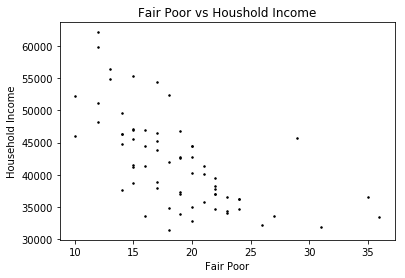

In [5]:
pl.plot(df["FairPoor"], df["Household Income"], 'o', color = 'black',markersize=1.5)
pl.xlabel("Fair Poor")
pl.ylabel("Household Income")
pl.title("Fair Poor vs Houshold Income");

So this is just for sanity check sake, but makes sense with what the categories are. Those rated higher on the fairly poor scale obviously have a lower household income, and it shows with the sharp decrease.
Now the next obvious step would be to make a for loop, graphing all the ones in the trimmed dataset. 

In [6]:
print(trimmed.columns)
print(trimmed.columns[0])

Index([u'FairPoor', u'Health Costs', u'Household Income', u'Free Lunch'], dtype='object')
FairPoor


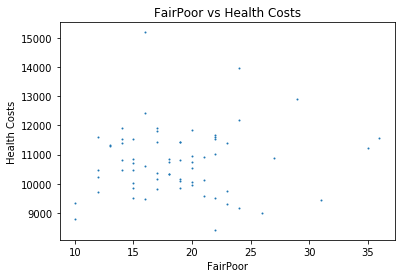

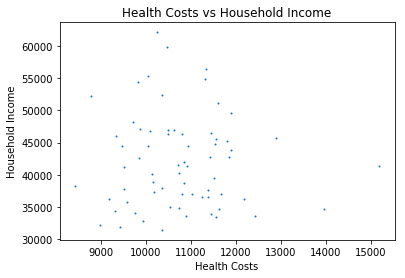

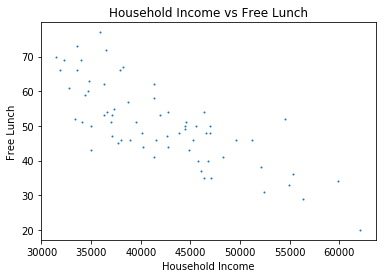

In [7]:
for i in range(0,3):
    pl.plot(trimmed[trimmed.columns[i]], trimmed[trimmed.columns[i+1]], 'o', markersize = 1)
    pl.xlabel(trimmed.columns[i])
    pl.ylabel(trimmed.columns[i + 1])
    pl.title(trimmed.columns[i] + " vs " + trimmed.columns[i + 1]);
    pl.show()

So while this is nice and all, the drawback of using a for loop causes the categories selected to be sequential. This is missing quite a few combinations, and the only other way to counteract this method would be to have a factorial draw. That OR a conditional drawing statement, which seems like a brute force cheat but definitely would also work. Regardless, the sanity check is pretty much done, extra mile not taken. 
The actual first step of the project would then involve the Classifier application on WEKA. Logistic regression is also available for analyzing this data, and integration with Jupyter is probably the best long-term lesson I could do.

In [8]:
import statsmodels.formula.api as smf
model = smf.ols('LBW ~ FairPoor', data=df)
model = model.fit()
model.params

Intercept    7.872819
FairPoor     0.036734
dtype: float64

Sooo here's the thing. WEKA is like, way slicker and easier in terms of visualizing and having a multi class logistic regression than how it is within Jupyter. I think the most efficient, ie less backtracking, way of doing this analysis would probably be external classification and pre-processing, then screencapping and importing for a slideshow?
So with these four points, let's decide on something to *predict*. Of the four, why don't we look into the proportion of financial strain that medical costs hold on a person? To do this, we basically need to make a new metric that is based on medical cost. So now we could just standardize the medical health costs, from 0 to 1, or for a more complicated metric we could make a ratio of household income with health costs, although that would invariably affect the relation with household income. 

In [9]:
from sklearn import preprocessing

x_array = np.array(df['Health Costs'])
normalized_X = preprocessing.normalize([x_array])
print(normalized_X)

[[0.10748224 0.1456743  0.13342934 0.12251733 0.12208808 0.13446858
  0.13054884 0.12359046 0.11475692 0.12802982 0.11099532 0.12465229
  0.14046681 0.10655596 0.1344347  0.11354824 0.10695132 0.10739187
  0.10834074 0.11695965 0.1220203  0.12134254 0.1015292  0.1292272
  0.12857203 0.13188178 0.13121531 0.12928368 0.13773315 0.1113342
  0.11899295 0.09513562 0.11030626 0.12101495 0.11847333 0.10535858
  0.11233956 0.12863981 0.11690317 0.11993052 0.11497154 0.11149235
  0.17159881 0.0992361  0.11344657 0.11694836 0.15777241 0.13049236
  0.13394896 0.13112494 0.12917072 0.13043588 0.12329676 0.12311602
  0.11579616 0.12248344 0.11819093 0.10963979 0.12772482 0.11841685
  0.10518913 0.10379972 0.13011959 0.11439544 0.11387582 0.12138772
  0.12700187]]


So from here we can demonstrate the capacity for two variable linear regression on a scatterplot, but ultimately we'd want a multivariable analysis like we have for the classifiers in WEKA. 

In [10]:
X = trimmed.iloc[:, :-3].values  
y = trimmed.iloc[:, 1].values

print(X)
print(y)

[[15]
 [29]
 [17]
 [15]
 [14]
 [14]
 [36]
 [20]
 [17]
 [13]
 [17]
 [22]
 [16]
 [31]
 [17]
 [20]
 [16]
 [22]
 [21]
 [17]
 [19]
 [18]
 [26]
 [19]
 [23]
 [22]
 [22]
 [17]
 [24]
 [19]
 [20]
 [22]
 [23]
 [15]
 [14]
 [10]
 [20]
 [14]
 [18]
 [16]
 [19]
 [15]
 [16]
 [10]
 [15]
 [18]
 [24]
 [15]
 [20]
 [12]
 [19]
 [14]
 [21]
 [27]
 [12]
 [18]
 [12]
 [12]
 [13]
 [15]
 [23]
 [24]
 [22]
 [21]
 [19]
 [20]
 [35]]
[ 9515 12896 11812 10846 10808 11904 11557 10941 10159 11334  9826 11035
 12435  9433 11901 10052  9468  9507  9591 10354 10802 10742  8988 11440
 11382 11675 11616 11445 12193  9856 10534  8422  9765 10713 10488  9327
  9945 11388 10349 10617 10178  9870 15191  8785 10043 10353 13967 11552
 11858 11608 11435 11547 10915 10899 10251 10843 10463  9706 11307 10483
  9312  9189 11519 10127 10081 10746 11243]


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()  
regressor.fit(X_train, y_train)   
print(y_test)

[11445 10463  9327 10713  8422 11858  8988 15191 13967 11616 10178 10899
  9870 10843]


In [12]:
y_pred = regressor.predict(X_test)
print(y_pred)

[10663.05861991 10580.07443717 10546.88076408 10629.86494681
 10746.04280264 10712.84912954 10812.43014882 10646.46178336
 10779.23647573 10746.04280264 10696.252293   10829.02698537
 10629.86494681 10679.65545645]


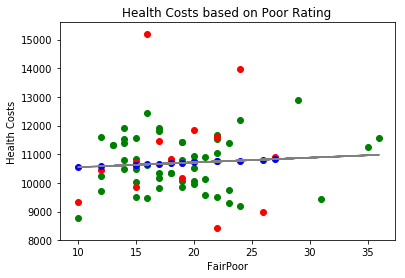

In [13]:
pl.scatter(X_train, y_train, color = 'green')
pl.scatter(X_test, y_test, color = 'red')   
pl.scatter(X_test, y_pred, color = 'blue')  # The predicted temperatures of the same X_test input.
pl.plot(X_train, regressor.predict(X_train), color = 'gray')
pl.title('Health Costs based on Poor Rating')
pl.xlabel('FairPoor')
pl.ylabel('Health Costs')
pl.show()

Now from this randomized linear regression the line is actually super flat. We would need to see the correlation coefficient, p-value, and ROC for this to have actual substance, but from a glance this implies health cost is not really affected by the FairPoor rating of the data. 

In [14]:
#test time
correlations = trimmed.corr(method='pearson')
print(correlations)

                  FairPoor  Health Costs  Household Income  Free Lunch
FairPoor          1.000000      0.076499         -0.636223    0.519747
Health Costs      0.076499      1.000000         -0.033677    0.031819
Household Income -0.636223     -0.033677          1.000000   -0.767029
Free Lunch        0.519747      0.031819         -0.767029    1.000000


Yup ,just like we thought. Health costs and fairpoor have a correlation coefficient of .0764, nearly nothing. The same applies for Health Costs across the board. It has very low correlation with any of the other variables. 

In [23]:
correlations = df.corr(method='pearson')
print(tabulate(correlations))
#visualizing the entire spread

-----------------------------------------  ----------  -----------  ----------  -----------  ----------  -----------  ----------  ----------  ----------  ----------  -----------  -----------  -----------  ----------  ----------  -----------  ----------  -----------  -----------  -----------  ------------  -----------  -----------  -----------  ----------  -----------  ----------  ----------  ----------  ----------  -----------  -----------  -----------  -----------  ----------  -----------  -----------  -----------  -----------  ------------
FairPoor                                    1           0.821782     0.559562    0.194398     0.576455    0.620989     0.697197   -0.636725    0.0560433   0.583414   -0.548929    -0.330626    -0.435727     0.443321   -0.349142    0.30471      0.566201    0.256929    -0.0802865    0.180911    -0.0980264     0.103919     0.182709    -0.462945    -0.233888   -0.143212     0.0824705  -0.107077   -0.348865    0.529051    0.594486     0.07153      0.5362